In [28]:
import networkx as nx
from networkx import to_numpy_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [2]:
G = nx.read_gml('dolphins.gml')

In [6]:
def plot_graph(G):
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    nx.draw_networkx(G, pos, edges=edges);
    nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_size=300, node_color='r', alpha=0.8)
    nx.draw_networkx_edges(G, pos, edgelist=edges,alpha =0.4)
    plt.show()

c:\users\lx\appdata\local\programs\python\python37\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


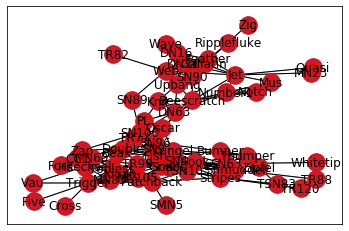

['Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'Patchback', 'PL', 'Quasi', 'Ripplefluke', 'Scabs', 'Shmuddel', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Stripes', 'Thumper', 'Topless', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'Trigger', 'TSN103', 'TSN83', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel']


In [7]:
plot_graph(G)
print(list(G.nodes()))

In [11]:
# 构建GCN，计算A_hat和D_hat矩阵
order = sorted(list(G.nodes()))
#按照字母顺序排序
print(order)
A = to_numpy_matrix(G, nodelist=order)
#邻接矩阵
print('A=\n', A) 

['Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'PL', 'Patchback', 'Quasi', 'Ripplefluke', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Scabs', 'Shmuddel', 'Stripes', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'TSN103', 'TSN83', 'Thumper', 'Topless', 'Trigger', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel']
A=
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [12]:
# 生成对角矩阵
I = np.eye(G.number_of_nodes())
A_hat = A + I
print('A_hat=\n', A_hat)

A_hat=
 [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 1.]]


In [17]:
# D_hat为A_hat的度矩阵
D_hat = np.array(np.sum(A_hat, axis=0))[0]
print('D_hat=\n', D_hat)
# 得到对角线上的元素
D_hat = np.matrix(np.diag(D_hat))
print('D_hat=\n', D_hat)

D_hat=
 [ 7.  9.  5.  4.  2.  5.  7.  6.  7.  8.  6.  2.  2.  9. 13.  8.  7. 10.
  8.  5. 10.  7.  2.  4.  7.  4.  4.  6.  6.  6. 10.  2.  4.  2.  8. 12.
  9.  3.  9.  6.  7. 11.  6.  8.  3.  7.  2.  3.  8.  5.  3.  5. 12. 11.
  8.  3.  3. 10.  2.  6.  2.  4.]
D_hat=
 [[7. 0. 0. ... 0. 0. 0.]
 [0. 9. 0. ... 0. 0. 0.]
 [0. 0. 5. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 6. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 4.]]


In [25]:
# 初始化权重
W_1 = np.random.normal(loc=0, scale=1, size=(G.number_of_nodes(), 100))
W_2 = np.random.normal(loc=0, size=(W_1.shape[1], 100))
print('W_1=\n', W_1)
print('W_2=\n', W_2)


W_1=
 [[-0.851818   -1.37396882 -0.10047374 ...  1.18588791 -2.18529487
   0.60657156]
 [-1.01137891 -0.07718735 -0.01931077 ... -0.50853091  1.07723558
   0.96720892]
 [ 0.11048324 -2.25044822 -1.71367775 ...  1.54025298  0.23091628
  -0.19028126]
 ...
 [-1.23487968  1.05601954  0.23895656 ...  1.16126245  0.36760997
  -0.67470583]
 [ 1.3433812  -1.19180066  0.6542553  ...  0.9077312   0.05028633
  -0.3344584 ]
 [ 0.35140718 -0.92683545 -0.24694303 ...  1.64684941  0.27904804
   0.04662804]]
W_2=
 [[ 0.7471591   0.857983    0.78243048 ...  1.3563375   0.19829551
  -0.31478526]
 [ 1.29948803 -0.39599189 -1.078211   ...  0.44835362  0.48745312
   0.25235062]
 [ 1.84114352 -1.27026204  0.21682595 ...  0.17496334 -0.13591528
   0.19440174]
 ...
 [ 0.03001022 -0.13593644 -0.60787534 ...  2.46088339  0.60637691
   0.39949734]
 [ 0.48139017 -0.27083134 -1.51577019 ...  0.21811082 -0.71682804
  -0.6410134 ]
 [ 2.18016061  0.59878565  0.96029633 ...  0.72751036 -0.50995067
   0.89248905]]


In [26]:
# x<0时 结果=0; x>=0时，结果=x
def relu(x):
    return(abs(x)+x)/2

# 叠加GCN层，这里只使用单位矩阵作为特征表征，即每个节点被表示为一个 one-hot 编码的类别变量
def gcn_layer(A_hat, D_hat, X, W):
	return relu(D_hat**-1 * A_hat * X * W)
H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2
print('output=\n', output)

output=
 [[0.3647622  1.89277339 1.31560022 ... 2.86376554 0.         0.        ]
 [0.80268007 2.47875679 0.         ... 1.56293712 0.06536093 0.        ]
 [2.40755855 3.14604276 0.         ... 5.36904622 0.         0.        ]
 ...
 [1.18413965 1.49068643 0.07446926 ... 0.         0.72179736 0.        ]
 [0.         6.8158094  2.84823221 ... 1.09549696 0.         0.        ]
 [4.50659241 2.87486224 0.82628225 ... 3.07860007 0.63037832 0.        ]]


In [27]:
# 提取特征表征
feature_representations = {}
nodes = list(G.nodes())
for i in range(len(nodes)):
    feature_representations[nodes[i]] = np.array(output)[i]
print('feature_representations=\n', feature_representations)

feature_representations=
 {'Beak': array([0.3647622 , 1.89277339, 1.31560022, 0.        , 0.        ,
       0.        , 4.65596035, 0.        , 1.38359669, 0.        ,
       0.        , 1.41983168, 2.15814961, 2.42632672, 0.        ,
       0.        , 0.        , 0.        , 0.87120032, 0.        ,
       0.06256574, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.72604506, 0.        , 0.03824618,
       2.71459142, 1.91074279, 0.        , 0.98440061, 0.        ,
       0.        , 0.66284106, 0.45783791, 0.61179869, 1.49994104,
       1.80797274, 0.        , 0.        , 3.13514564, 1.47451606,
       0.        , 1.4418252 , 1.00270407, 0.85850994, 2.77293642,
       2.45295333, 0.        , 0.        , 1.39423158, 0.        ,
       0.        , 0.        , 1.18815166, 0.        , 0.        ,
       0.        , 0.        , 0.94337181, 0.        , 0.        ,
       1.61487506, 0.        , 2.5753541 , 0.        , 1.71731301,
       0.        , 0.      

In [ ]:
# 在二维空间中绘制所选节点的向量
def plot_nodes(word_list):
	# 每个节点的embedding为100维
    X = model.w2v_model[word_list]
    #print(type(X))
    # 将100维向量减少到2维
    pca = PCA(n_components=2)
    result = pca.fit_transform(X) 
    #print(result)
    # 绘制节点向量
    plt.figure(figsize=(12,9))
    # 创建一个散点图的投影
    plt.scatter(result[:, 0], result[:, 1])
#    for i, word in enumerate(word_list):
#        plt.annotate(word, xy=(result[i, 0], result[i, 1]))        
    plt.show()
# 将所有的球队embedding进行绘制
plot_nodes(model.w2v_model.wv.vocab)

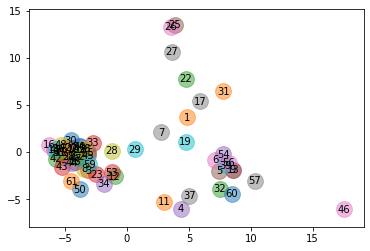

In [31]:

# 绘制output，节点GCN embedding可视化
def plot_node(output):
# 将100维向量减少到2维
    pca = PCA(n_components=2)
    output = pca.fit_transform(output) 
    for i in range(len(nodes)):
        node_name = nodes[i]
        plt.scatter(np.array(output)[i,0],np.array(output)[i,1] ,label=str(i),alpha=0.5,s = 250)
        plt.text(np.array(output)[i,0],np.array(output)[i,1] ,i, horizontalalignment='center',verticalalignment='center', fontdict={'color':'black'})
    plt.show()
plot_node(output)

output(去掉relu)=
: [[-2.91664014  0.98618567 -0.65143224 ...  3.08224193 -0.35820337
  -3.03911768]
 [ 0.73061527  1.89822374 -2.33269029 ...  1.58741311  1.35970659
   0.17168189]
 [-1.77520359  3.44851364 -4.67487013 ...  5.9333903   1.33238522
  -2.12051742]
 ...
 [-2.54487527  1.14721502 -1.63609407 ... -4.53107355  1.58439595
  -2.80770821]
 [-2.63642895  5.31836634  3.08352403 ...  4.00928386 -3.95654879
   8.4583087 ]
 [ 3.04966422  2.59000264  0.5076157  ...  2.2435694   4.50016456
  -0.52246464]]


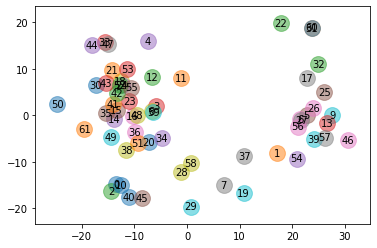

In [32]:
# 尝试去掉激活函数relu，重新运行一遍
def gcn_layer(A_hat, D_hat, X, W):
    return D_hat**-1 * A_hat * X * W
H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2
print("output(去掉relu)=\n:",output)

plot_node(output)